In [176]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.pyplot import subplots
from pandas import DataFrame, read_csv

In [177]:
all_write_data: DataFrame = read_csv('data/purp.csv')
all_write_data_100k: DataFrame = all_write_data[(all_write_data['data_size'] == 100000) & (all_write_data['wal_file_count'] != 50.0)]
all_write_data_100k

,system,server_count,data_size,read_ratio,num_clients,num_dbs,wal_file_count,fast_path_writes,ops,med,p95,p99
7,etcdl,3,100000,0.0,33,1.0,1.0,True,2308,23510,68365,159000
8,etcdl,3,100000,0.0,33,1.0,10.0,True,6905,12979,17492,19549
16,etcdl,3,100000,0.0,33,1.0,5.0,True,5808,15185,20287,21611
17,etcd,3,100000,0.0,33,NaN,NaN,NaN,1646,49886,99137,117876


['etcd', 'etcd-light(1, 1)', 'etcd-light(5, 1)', 'etcd-light(10, 1)']
[1646, 2308, 5808, 6905]


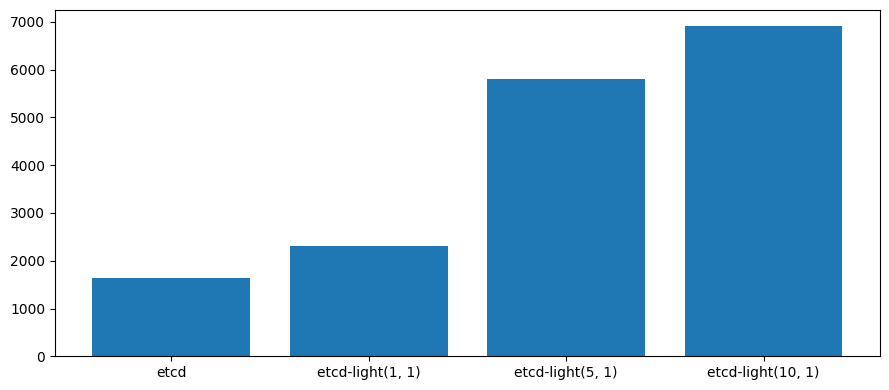

In [178]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[float] = []
for i, row in all_write_data_100k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['ops'])

l: list[str] = []
l.append(labels[3])
l.append(labels[0])
l.append(labels[2])
l.append(labels[1])

v = []
v.append(vals[3])
v.append(vals[0])
v.append(vals[2])
v.append(vals[1])

print(l)
print(v)

ax.bar(l, v, color='C0')
fig.tight_layout()

fig.savefig('plots/100k_wal_throughput.png')
fig.savefig('plots/100k_wal_throughput.pdf')

['etcd-light(1, 1)', 'etcd-light(10, 1)', 'etcd-light(5, 1)', 'etcd']
[23.51, 12.979, 15.185, 49.886]
[68.365, 17.492, 20.287, 99.137]
[159.0, 19.549, 21.611, 117.876]


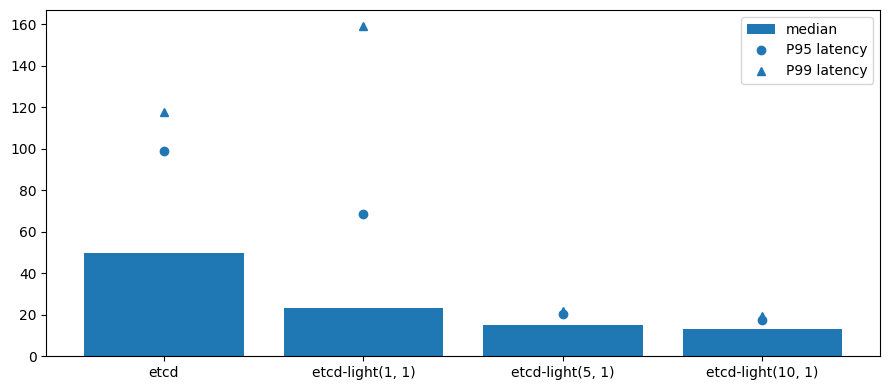

In [179]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[int] = []
tail95: list[int] = []
tail99: list[int] = []
for i, row in all_write_data_100k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['med'] / 1000)
  tail95.append(row['p95'] / 1000)
  tail99.append(row['p99'] / 1000)

l: list[str] = []
l.append(labels[3])
l.append(labels[0])
l.append(labels[2])
l.append(labels[1])

v = []
v.append(vals[3])
v.append(vals[0])
v.append(vals[2])
v.append(vals[1])

p9 = []
p9.append(tail99[3])
p9.append(tail99[0])
p9.append(tail99[2])
p9.append(tail99[1])

p5 =[]
p5.append(tail95[3])
p5.append(tail95[0])
p5.append(tail95[2])
p5.append(tail95[1])

print(labels)
print(vals)
print(tail95)
print(tail99)

ax.bar(l, v, color='C0')
ax.plot(l, p5, color='C0', linestyle='', marker='o')
ax.plot(l, p9, color='C0', linestyle='', marker='^')

fig.tight_layout()

ax.legend(
  handles=[
    Patch(facecolor='C0', label='median'),
    Line2D([0], [0], marker='o', color='C0', linestyle='None', label='P95 latency'),
    Line2D([0], [0], marker='^', color='C0', linestyle='None', label='P99 latency')
  ],
  loc='upper right')

fig.savefig('plots/100k_wal_latency.png')
fig.savefig('plots/100k_wal_latency.pdf')

In [180]:
all_write_data_10k: DataFrame = all_write_data[(all_write_data['data_size'] == 10000) & ((all_write_data['wal_file_count'] == 1.0) | (all_write_data['system'] == 'etcd')) & (all_write_data['fast_path_writes'] != True)]
all_write_data_10k

,system,server_count,data_size,read_ratio,num_clients,num_dbs,wal_file_count,fast_path_writes,ops,med,p95,p99
0,etcd,3,10000,0.0,33,NaN,NaN,NaN,5046,11642,43681,64690
4,etcdl,3,10000,0.0,33,1.0,1.0,False,7070,11507,25201,35387
5,etcdl,3,10000,0.0,33,3.0,1.0,False,18143,5309,5918,6272
6,etcdl,3,10000,0.0,33,5.0,1.0,False,22875,4125,4964,5460


['etcd', 'etcd-light(1, 1)', 'etcd-light(1, 3)', 'etcd-light(1, 5)']
[5046, 7070, 18143, 22875]


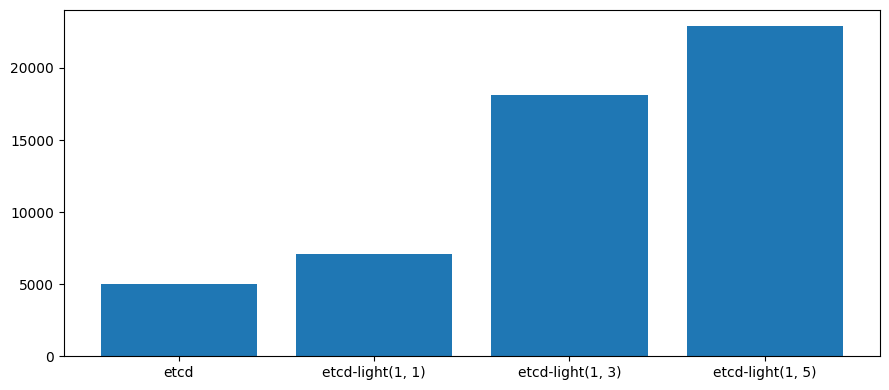

In [181]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[float] = []
for i, row in all_write_data_10k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['ops'])

print(labels)
print(vals)

# l: list[str] = []
# l.append(labels[3])
# l.append(labels[0])
# l.append(labels[2])
# l.append(labels[1])

# v = []
# v.append(vals[3])
# v.append(vals[0])
# v.append(vals[2])
# v.append(vals[1])

# print(l)
# print(v)

ax.bar(labels, vals, color='C0')
fig.tight_layout()

fig.savefig('plots/10k_dbs_throughput.png')
fig.savefig('plots/10k_dbs_throughput.pdf')

['etcd', 'etcd-light(1, 1)', 'etcd-light(1, 3)', 'etcd-light(1, 5)']
[11.642, 11.507, 5.309, 4.125]
[43.681, 25.201, 5.918, 4.964]
[64.69, 35.387, 6.272, 5.46]


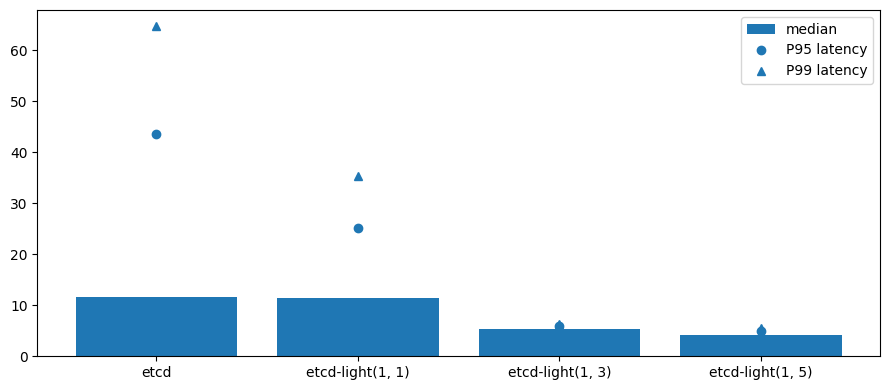

In [182]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[int] = []
tail95: list[int] = []
tail99: list[int] = []
for i, row in all_write_data_10k.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['med'] / 1000)
  tail95.append(row['p95'] / 1000)
  tail99.append(row['p99'] / 1000)

# l: list[str] = []
# l.append(labels[3])
# l.append(labels[0])
# l.append(labels[2])
# l.append(labels[1])

# v = []
# v.append(vals[3])
# v.append(vals[0])
# v.append(vals[2])
# v.append(vals[1])

# p9 = []
# p9.append(tail99[3])
# p9.append(tail99[0])
# p9.append(tail99[2])
# p9.append(tail99[1])

# p5 =[]
# p5.append(tail95[3])
# p5.append(tail95[0])
# p5.append(tail95[2])
# p5.append(tail95[1])

print(labels)
print(vals)
print(tail95)
print(tail99)

ax.bar(labels, vals, color='C0')
ax.plot(labels, tail95, color='C0', linestyle='', marker='o')
ax.plot(labels, tail99, color='C0', linestyle='', marker='^')

fig.tight_layout()

ax.legend(
  handles=[
    Patch(facecolor='C0', label='median'),
    Line2D([0], [0], marker='o', color='C0', linestyle='None', label='P95 latency'),
    Line2D([0], [0], marker='^', color='C0', linestyle='None', label='P99 latency')
  ],
  loc='upper right')

fig.savefig('plots/10k_dbs_latency.png')
fig.savefig('plots/10k_dbs_latency.pdf')

In [183]:
read_95_data: DataFrame = read_csv('data/purp2.csv')
read_95_data

,system,server_count,data_size,read_ratio,num_clients,num_dbs,wal_file_count,fast_path_writes,ops,med,p95,p99
0,etcd,3,10000,0.95,33,NaN,NaN,NaN,55487,1477,2612,3429
1,etcdl,3,10000,0.95,33,1.0,1.0,False,70994,1068,1941,2310
2,etcdl,3,10000,0.95,33,3.0,1.0,False,89859,802,1470,1745
3,etcdl,3,10000,0.95,33,5.0,1.0,False,97337,704,1368,1702


['etcd', 'etcd-light(1, 1)', 'etcd-light(1, 3)', 'etcd-light(1, 5)']
[55487, 70994, 89859, 97337]


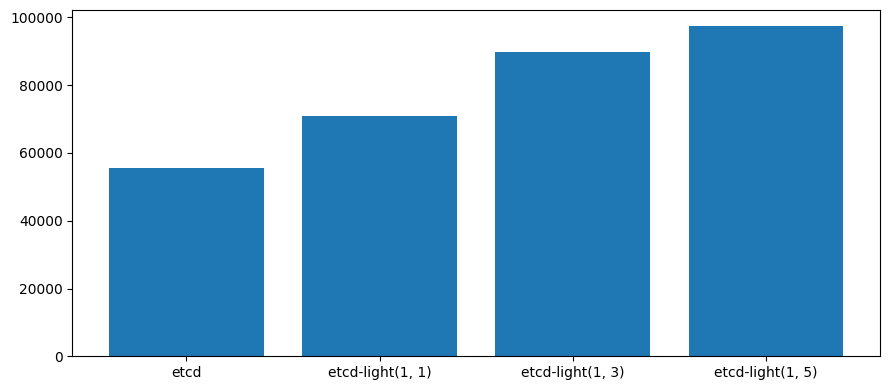

In [184]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[float] = []
for i, row in read_95_data.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['ops'])

print(labels)
print(vals)

ax.bar(labels, vals, color='C0')
fig.tight_layout()

fig.savefig('plots/10k_dbs_95_read_throughput.png')
fig.savefig('plots/10k_dbs_95_read_throughput.pdf')

['etcd', 'etcd-light(1, 1)', 'etcd-light(1, 3)', 'etcd-light(1, 5)']
[1.477, 1.068, 0.802, 0.704]
[2.612, 1.941, 1.47, 1.368]
[3.429, 2.31, 1.745, 1.702]


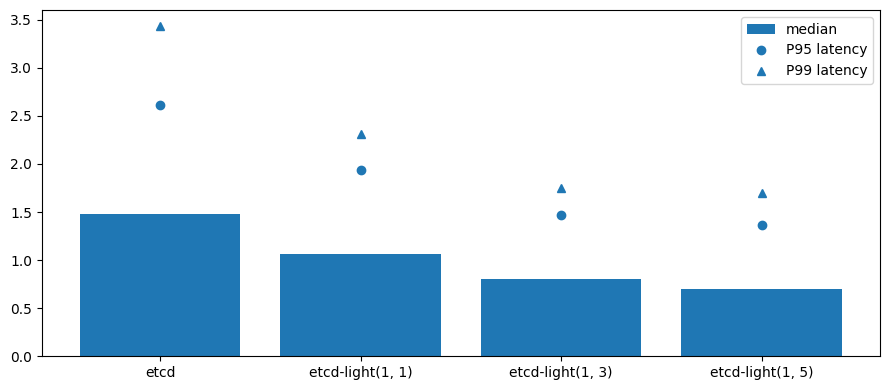

In [185]:
fig: Figure
ax: Axes
fig, ax = subplots(figsize=(9, 4))

labels: list[str] = []
vals: list[int] = []
tail95: list[int] = []
tail99: list[int] = []
for i, row in read_95_data.iterrows():
  match row['system']:
    case 'etcd':
      labels.append('etcd')
    case 'etcdl':
      labels.append(f'etcd-light({int(row["wal_file_count"])}, {int(row["num_dbs"])})')
  
  vals.append(row['med'] / 1000)
  tail95.append(row['p95'] / 1000)
  tail99.append(row['p99'] / 1000)

print(labels)
print(vals)
print(tail95)
print(tail99)

ax.bar(labels, vals, color='C0')
ax.plot(labels, tail95, color='C0', linestyle='', marker='o')
ax.plot(labels, tail99, color='C0', linestyle='', marker='^')

fig.tight_layout()

ax.legend(
  handles=[
    Patch(facecolor='C0', label='median'),
    Line2D([0], [0], marker='o', color='C0', linestyle='None', label='P95 latency'),
    Line2D([0], [0], marker='^', color='C0', linestyle='None', label='P99 latency')
  ],
  loc='upper right')

fig.savefig('plots/10k_dbs_95_read_latency.png')
fig.savefig('plots/10k_dbs_95_read_latency.pdf')